## Verifying that Or-of-Ands = Nand-of-Nands

Since Z3 does not have a shorthand for NAND, we will make our own below:

In [ ]:
def Nand( *args ):
  return Not( And( args ) )

Let's run a sanity check to verify whether it behaves the way we want; we will compare it with Not(And(*)) and check if it behaves the same way. To do this, we will construct a solver with the constraint

$$ \text{Nand}(x_1, x_2) \not= \text{Not}(\text{And}(x_1, x_2)) $$

Observe that we are asking the solver to find an assignment of $x_1$ and $x_2$ such that Nand($x_1,x_2$) and Not(And($x_1,x_2$)) have different outputs. If no such assignment exists, then we can conclude that they behave the same on all inputs (of two variables).

In [ ]:
s = Solver() # initialize solver

# initialize variables
x1 = Bool('x_1')
x2 = Bool('x_2')

s.add(
    Nand( x1, x2 ) != Not(And( x1, x2 ))
 )

showSolver( s )
print( s.check() )

Recall that "unsat" means there is no solution for our given constraints, so we have verified that Nand($x_1,x_2$) and Not(And($x_1,x_2$)) behave the same way.

Note that in this case it is obvious that Nand() and Not(And()) are the same, but demonstrating it using Z3 is a useful exercise before we move on to our main goal: showing that an OR of ANDs can be represented using only NANDS.

Since this idea can help us verify things, Z3 has an in-built function called prove() which works similarly. Let's see how we can use it below.

In [ ]:
# initialize variables
x1 = Bool('x_1')
x2 = Bool('x_2')

F = Nand( x1, x2 ) # define the first function
G = Not(And( x1, x2 )) # define the second function

prove( F == G )

Here, "proved" means that the statement has been verified. If we were to give the prove() function an untrue statement, it would provide a counterexample.

In [ ]:
# initialize variables
x1 = Bool('x_1')
x2 = Bool('x_2')

F = Nand( x1, x2 ) # define the first function
G = Or( x1, x2 ) # define the second function

prove( F == G )

### 2.2 OR-of-ANDs = NAND-of-NANDs

Using the same idea we used above to show that Nand($x_1,x_2$) $=$ Not(And($x_1,x_2$)), we will verify that Or-of-Ands = Nand-of-Nands for the following setting:

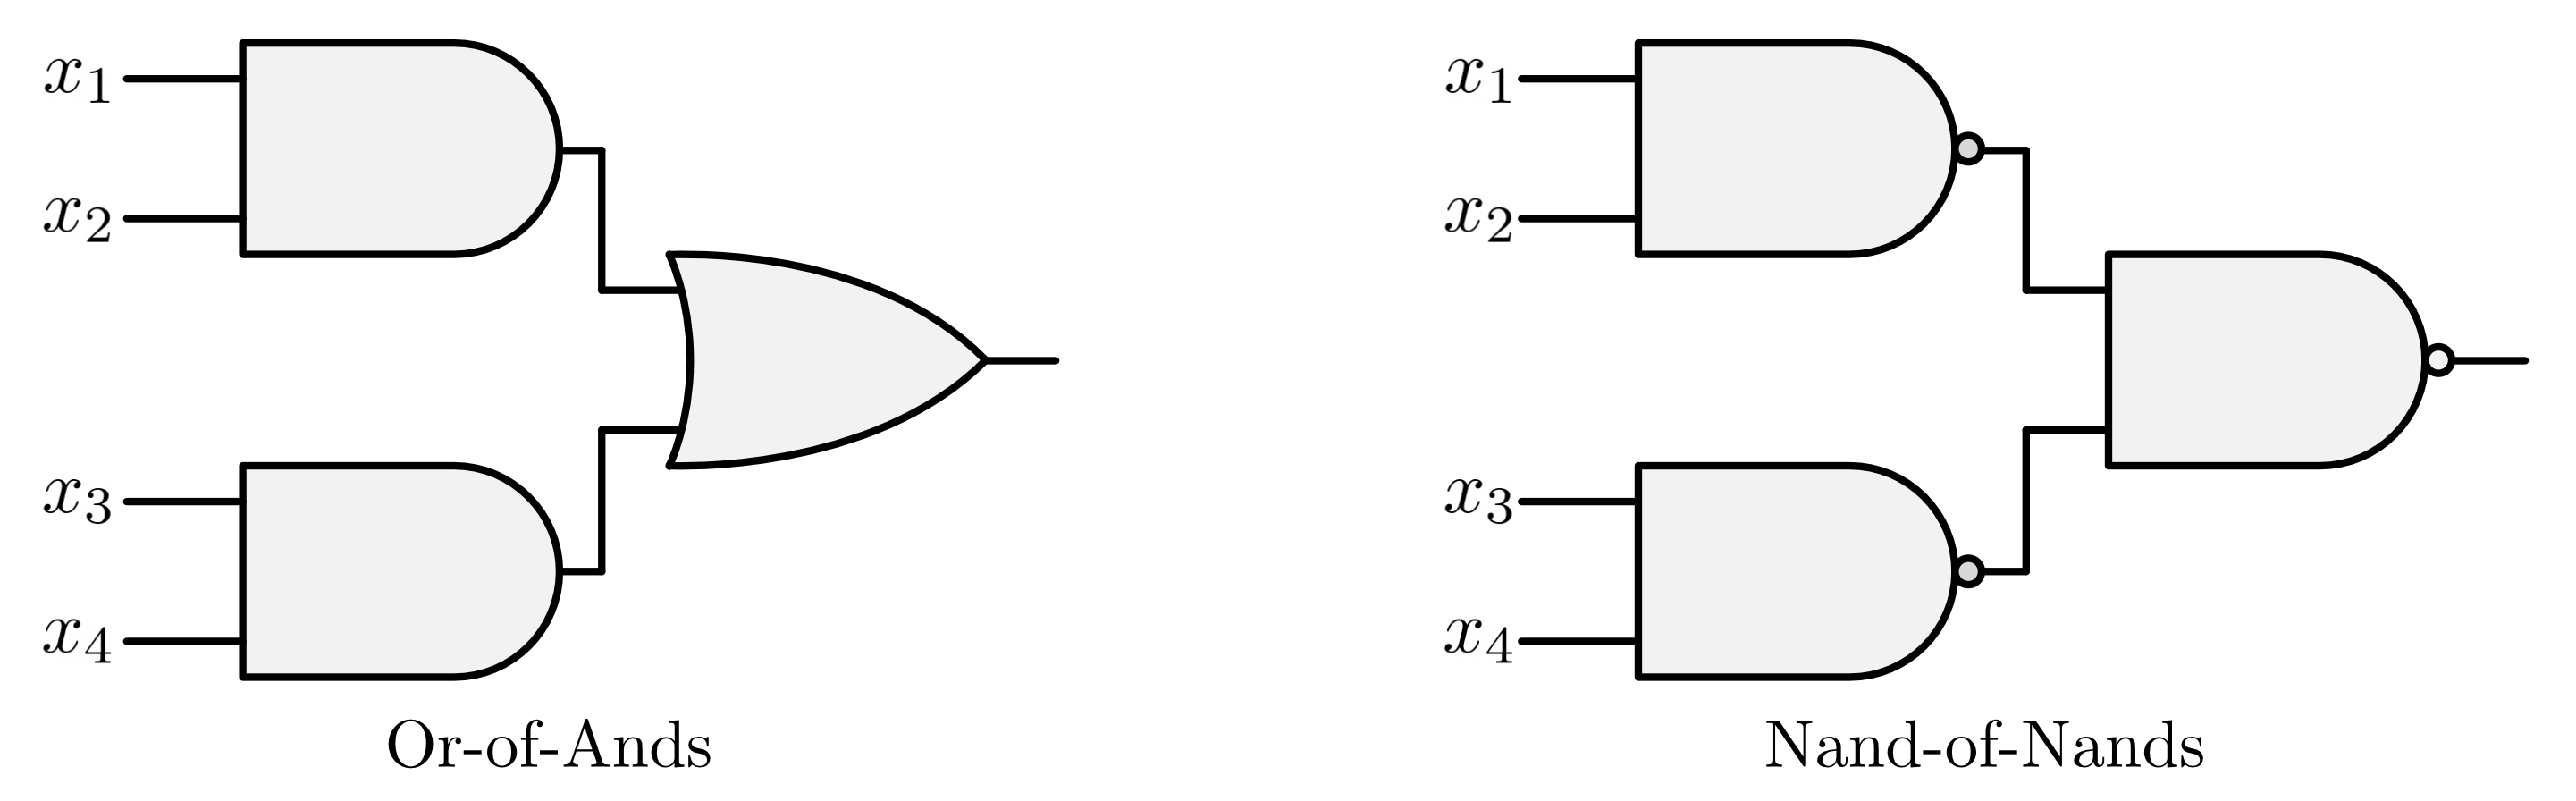

In the cell below, we will encode the circuit on the left and the circuit on the  encodes the circuit on the right. Then, we will ask Z3 to find an assignment for $x_1, x_2, x_3, x_4$ where the circuits have different outputs.

The variables have already been defined, and the circuit on the left has already been written. Replace the definition of G with the proper Nand-of-Nands formula we are trying to prove is equivalent to the Or-of-Ands.

In [ ]:
s = Solver() # initialize solver

# initialize variables
x1 = Bool('x_1')
x2 = Bool('x_2')
x3 = Bool('x_3')
x4 = Bool('x_4')

F = Or( And( x1, x2 ), And( x3, x4 ) )
G = True # REPLACE THIS LINE

prove( F == G )

###Congratulations! You have proven that Or-of-Ands is the same as Nand-of-Nands (for this simple case at least) using Z3!

####If you'd like to continue your Z3 journey, you can start with this guide to learn more: https://ericpony.github.io/z3py-tutorial/guide-examples.htm
